<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/DimReduction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Dimensionality reduction -- Non-linear manifold learning techniques



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---
### Generating Random Data
Using the code below, generate the next data structure on which to work, which is known as the <b> swiss roll </b>.

In [ ]:
def swiss_roll_2d( n_sample=1000, noise=0.1 ):
  from numpy.random import normal
  theta = np.linspace(0, 3 * np.pi, n_sample)
  R = np.linspace(1, 5, n_sample)
  X = R * np.cos(theta) + normal(scale=noise, size=n_sample)
  Y = R * np.sin(theta) + normal(scale=noise, size=n_sample)
  return np.hstack((X.reshape(-1,1), Y.reshape(-1,1)))

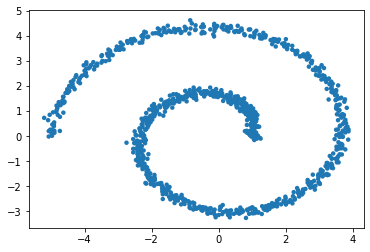

In [ ]:
data = swiss_roll_2d()

plt.scatter(data[:,0], data[:,1], s=20, edgecolor='none')
plt.show()

---
## Diffusion maps

The swiss roll contains data that are intrinsically non linear, ie it is not possible to use linear functions to unwrap the line. 

Here we will introduce a <b> non-linear </b> dimensionality reduction approach, called Diffusion Maps. 

Q1. Write a function that calculates the diffusion maps. Follow these steps:

1. Calculate a matrix <b> dist </b> containing all pairwise distances (you should know the right function by now).
2. Push the matrix through a Gaussian kernel, to obtain an <b> affinity matrix </b>, that contains ~ 0 if i,j are distant, and ~ 1 if they are close. 
3. Check that the affinity matrix is symmetric. Now transform it into a <b> transition matrix </b> by normalising it, s.t. the sum over all rows is 1. 
4. Diagonalize the transition matrix, calculating eigenvalues and eigenvectors. Hint: you should use scipy.sparse.linalg.eigs. Can you explain why?
5. Calculate the first non trivial diffusion map, and check if it correctly unwraps the 1d swiss roll (ie, color the swiss roll according to the value of the first non trivial diffusion map of each point). 
6. Remember, given eigenvalues and eigenvectors, the projections on the i-th diffusion map of all data point is obtained by <b>evals[i] * evecs[:,i]</b>.

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigs

Q2. Were you succesful? What parameter did you have to tune in order to get a good dimensionality reduction?

Q3. Another way of checking if you can retrieve the 1d nature of the data, is to check if the diffusion map is in a one-to-one mapping with the 1d parameter that controls the generation of the swiss roll.

---
## Spectral clustering

As an optional task, you can try to reproduce your dimensionality reduction using sklearn <b>spectral embedding</b>

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

In [ ]:
from sklearn.manifold import SpectralEmbedding

In [ ]:
embedding = SpectralEmbedding(n_components=1, affinity='rbf', gamma=1)
X_transformed = embedding.fit_transform(data)